### Import Library

In [68]:
import numpy as np
import pandas as pd
import re
import string
import math
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Import Dataset

In [80]:
data = pd.read_excel('twitter.xlsx')
data.head()

,cl1,cl2,cl3,cl4,cl5,cl6
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Cleaning Data

In [81]:
data.drop(columns=['cl1 ','cl2','cl3','cl4','cl5'], axis=1, inplace=True)

In [82]:
data.rename(columns={'cl6':'Tweets'},inplace=True)

In [84]:
sample_data = data

### Dataset shape

In [85]:
sample_data.shape

(2000, 1)

### Defining Functions

In [41]:
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not", "doesn't":"does not","who'll":"who will", "you'll":"you will"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)


In [53]:
#remove stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])


In [58]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

### Data Preparation

In [87]:
sample_data['Tweets']= sample_data['Tweets'].apply(lambda x:expand_contractions(x))

In [88]:
sample_data['Tweets']= sample_data['Tweets'].str.lower()

In [89]:
sample_data['Tweets']= sample_data['Tweets'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [90]:
sample_data['Tweets']= sample_data['Tweets'].apply(lambda x: re.sub('W*dw*','',x))

In [91]:
sample_data['Tweets']= sample_data['Tweets'].apply(lambda x: remove_stopwords(x))

In [92]:
sample_data['Tweets']= sample_data['Tweets'].apply(lambda text: lemmatize_words(text))

### Sentiment Analysis

In [93]:
sia = SentimentIntensityAnalyzer()

In [94]:
sample_data['sentiment_scores'] = sample_data['Tweets'].apply(lambda text: sia.polarity_scores(text))
sample_data['compound_score'] = sample_data['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])
sample_data['sentiment'] = sample_data['compound_score'].apply(lambda score: 'positive' if score >= 0 else 'negative')

In [95]:
sample_data.head()

,Tweets,sentiment_scores,compound_score,sentiment
0,switchfoot httptwitpiccom2y1zl awww bummer sho...,"{'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'comp...",-0.3818,negative
1,upset cant upate facebook texting might cry re...,"{'neg': 0.441, 'neu': 0.559, 'pos': 0.0, 'comp...",-0.7269,negative
2,kenichan ive many time ball manage save 50 res...,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...",0.4939,positive
3,whole boy feel itchy like fire,"{'neg': 0.45, 'neu': 0.3, 'pos': 0.25, 'compou...",-0.2500,negative
4,nationwieclass behaving im cant see,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive


In [121]:
#Top ten postive tweets and top negative tweets
sample_data['testing']= sample_data['compound_score'].apply(lambda x: "Positive" if x>0.9 else ("Negative" if x < -0.85 else "Nothing"))

### Top Ten Positive tweets

In [133]:
Top_positive_comments = sample_data[sample_data['testing'] == "Positive"]
Top_positive_comments = Top_positive_comments.reset_index()
Top_positive_comments

,index,Tweets,sentiment_scores,compound_score,sentiment,testing
0,115,merceesashley amn grin inspirational saening t...,"{'neg': 0.093, 'neu': 0.297, 'pos': 0.61, 'com...",0.9042,positive,Positive
1,134,im missing babe long alive im happy yawwwnn im...,"{'neg': 0.076, 'neu': 0.382, 'pos': 0.542, 'co...",0.9246,positive,Positive
2,222,paulaabul awww goo luck paula please ont work ...,"{'neg': 0.0, 'neu': 0.418, 'pos': 0.582, 'comp...",0.9360,positive,Positive
3,1042,pretty goo coaching exceptional talent trounce...,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.9001,positive,Positive
4,1582,best monay ever misse gossip girl oh well spen...,"{'neg': 0.066, 'neu': 0.386, 'pos': 0.548, 'co...",0.9260,positive,Positive


### Top Ten Negative tweets

In [137]:
Top_negative_comments = sample_data[sample_data['testing'] == "Negative"]
Top_negative_comments = Top_negative_comments.reset_index()
Top_negative_comments

,index,Tweets,sentiment_scores,compound_score,sentiment,testing
0,72,really hate people i ban trace clearly ugly,"{'neg': 0.662, 'neu': 0.178, 'pos': 0.16, 'com...",-0.8576,negative,Negative
1,123,pain back sies hurt mention cry mae fail,"{'neg': 0.769, 'neu': 0.231, 'pos': 0.0, 'comp...",-0.9231,negative,Negative
2,937,rumlover empty rum barrel sa rum barrel shake ...,"{'neg': 0.609, 'neu': 0.391, 'pos': 0.0, 'comp...",-0.8720,negative,Negative
3,1178,horrible sore throat hurt,"{'neg': 0.904, 'neu': 0.096, 'pos': 0.0, 'comp...",-0.8555,negative,Negative
4,1505,blahhh throat sore amp keep coughing hate sick,"{'neg': 0.655, 'neu': 0.345, 'pos': 0.0, 'comp...",-0.8591,negative,Negative


In [ ]:
negative_dict = {'hate':2, 'ugly':1, 'pain':1,'hurt':3,'horror':5}
positive_dict = {'inspirational':1,'like':1,'love':3, 'happy':1, 'fun':1, 'best':1, 'well':1, 'pretty':2, 'wonderful':1}

In [150]:
negative_text = "hate hate ugly pain hurt hurt hurt hurt hurt horror horror horror horror horror horror"
positive_text = 'love love love love love pretty pretty pretty best happy like pretty wonderful'

### Visualizations

#### 1. Word Cloud

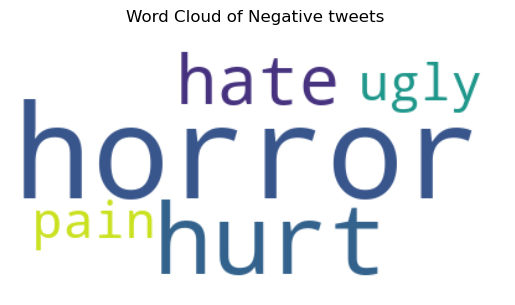

In [148]:
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(negative_text )
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("Word Cloud of Negative tweets \n")
plt.axis("off")
plt.show()

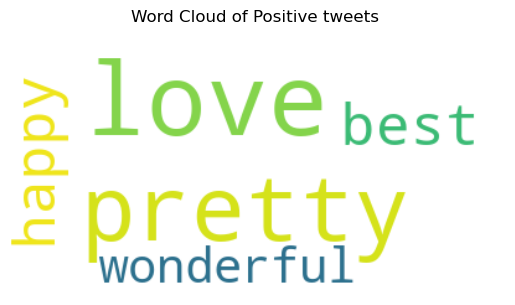

In [151]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(positive_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("Word Cloud of Positive tweets \n")
plt.axis("off")
plt.show()

#### 2. Histogram

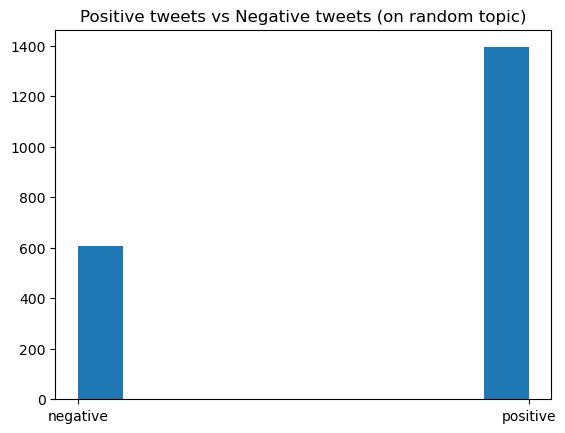

In [154]:
plt.hist(sample_data['sentiment'])
plt.title("Positive tweets vs Negative tweets (on random topic)")
plt.show()